In [ ]:
import pandas as pd


df = pd.read_csv("Deforestation.csv", header=0)


df = df[ df.Series  == 'Forest cover (thousand hectares)' ]

df = df.rename( {'Value':'Forest cover (thousand hectares)'}, axis = 1 )
df = df.drop(['Series'], axis = 1)

#df['Forest cover (thousand hectares)'] =
df['Region/Country/Area'].unique()


africa_countries = [ 'Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon', 'Congo','Côte d’Ivoire', 'Dem. Rep. of the Congo',
'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Kenya', 'Mauritius', 'Morocco',
'Mozambique', 'Namibia', 'Nicaragua', 'Niger', 'Nigeria', 'Senegal', 'South Africa',
'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'United Rep. of Tanzania','Zambia','Zimbabwe']


df = df[ df['Region/Country/Area'].isin(africa_countries) ]


def remove_comma(x):
  return x.replace(',', '')

df['Forest cover (thousand hectares)'] = df['Forest cover (thousand hectares)'].apply(remove_comma)

df['Forest cover (thousand hectares)'] = df['Forest cover (thousand hectares)'].astype(int)

forest_df = df.reset_index(drop=True)

species_df = pd.read_csv("Species2_updated.csv", header=0)
species_df = species_df.drop('Unnamed: 0', axis = 1)

species_df['Threatened Species: Total (number)'] = species_df['Threatened Species: Total (number)'].apply(remove_comma)

species_df['Threatened Species: Total (number)'] = species_df['Threatened Species: Total (number)'].astype(int)


merged_df = pd.merge(forest_df, species_df, on=['Year','Region/Country/Area'], how='inner')







In [ ]:
merged_df

,Region/Country/Area,Year,Forest cover (thousand hectares),Threatened Species: Total (number)
0,Algeria,2005,1749,50
1,Algeria,2010,1918,105
2,Algeria,2019,1939,145
3,Angola,2005,74933,76
4,Angola,2010,72158,117
...,...,...,...,...
81,Zambia,2010,46696,67
82,Zambia,2019,45002,98
83,Zimbabwe,2005,18136,43
84,Zimbabwe,2010,17905,55


# New Section

In [ ]:
# merged_df = merged_df[['Region/Country/Area',	'Year', 'Population mid-year estimates (millions)','Population density', 'Threatened Species: Total (number)']]
merged_df["Year"] = merged_df["Year"].astype(str)
merged_df = merged_df[ merged_df['Year'].isin(["2019"]) ]

In [ ]:
merged_top_df = merged_df.sort_values( by = ['Forest cover (thousand hectares)'], ascending=False ).head(5)
merged_top_df

,Region/Country/Area,Year,Forest cover (thousand hectares),Threatened Species: Total (number)
23,Dem. Rep. of the Congo,2019,127257,427
5,Angola,2019,67162,158
79,United Rep. of Tanzania,2019,46214,1174
82,Zambia,2019,45002,98
50,Mozambique,2019,36966,377


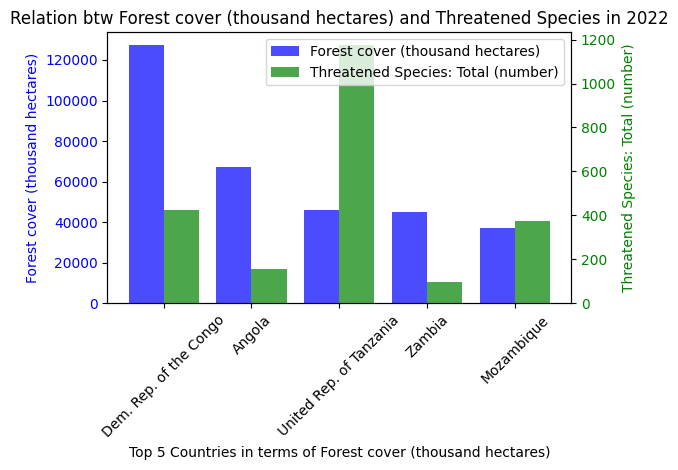

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

top_5_pop_countries =  list(merged_top_df['Region/Country/Area'])
values1 = merged_top_df['Forest cover (thousand hectares)']
values2 = merged_top_df['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Forest cover (thousand hectares)', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Top 5 Countries in terms of Forest cover (thousand hectares)')
ax1.set_ylabel('Forest cover (thousand hectares)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Forest cover (thousand hectares) and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
merged_bottom_df = merged_df.sort_values( by = ['Forest cover (thousand hectares)'], ascending=True ).head(5)
merged_bottom_df

,Region/Country/Area,Year,Forest cover (thousand hectares),Threatened Species: Total (number)
44,Mauritius,2019,39,266
76,Tunisia,2019,701,101
29,Eritrea,2019,1058,138
59,Niger,2019,1092,37
73,Togo,2019,1212,90


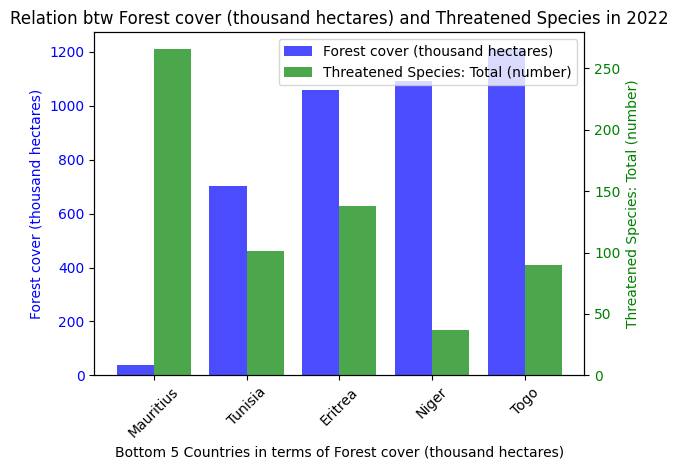

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

top_5_pop_countries =  list(merged_bottom_df['Region/Country/Area'])
values1 = merged_bottom_df['Forest cover (thousand hectares)']
values2 = merged_bottom_df['Threatened Species: Total (number)']

# Create an array of indices for the x-axis ticks
x = np.arange(len(top_5_pop_countries))

# Create the figure and the two axes
fig, ax1 = plt.subplots()

# Create the first set of bars on the left y-axis
bar1 = ax1.bar(x, values1, label='Forest cover (thousand hectares)', alpha=0.7, color='b', width=0.4)
ax1.set_xlabel('Bottom 5 Countries in terms of Forest cover (thousand hectares)')
ax1.set_ylabel('Forest cover (thousand hectares)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second set of bars on the right y-axis
ax2 = ax1.twinx()  # Create a twin y-axis that shares the same x-axis
bar2 = ax2.bar(x + 0.4, values2, label='Threatened Species: Total (number)', alpha=0.7, color='g', width=0.4)
ax2.set_ylabel('Threatened Species: Total (number)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set x-axis labels and legend
ax1.set_xticks(x + 0.2)
ax1.set_xticklabels(top_5_pop_countries, rotation=45)
plt.xticks(rotation=45)
plt.title('Relation btw Forest cover (thousand hectares) and Threatened Species in 2022')

# Combine the legends from both axes
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
# import seaborn as sns

# top_5_pop_countries = list(merged_top_df['Region/Country/Area'])
# values1 = merged_top_df['Forest cover (thousand hectares)']
# values2 = merged_top_df['Threatened Species: Total (number)']

# # Create a DataFrame for the data
# data = pd.DataFrame({'Country': top_5_pop_countries, 'Forest Cover': values1, 'Threatened Species': values2})


# sns.barplot(x='Country', y='Forest Cover', data=data, color='b', alpha=0.7, label='Forest cover (thousand hectares)')
# sns.barplot(x='Country', y='Threatened Species', data=data, color='g', alpha=0.7, label='Threatened Species: Total (number)')
